In [30]:
import numpy as np
import pandas as pd

In [31]:
data = pd.read_csv('Index.csv')
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data = data.sort_index(ascending=True)
data = data.rename(columns={'.GDAXI (TRDPRC_1)': 'DAX', '.FTSE (TRDPRC_1)': 'FTSE'})
data

/var/folders/qz/zw2_l33977s2ysrh3q_yxj740000gn/T/ipykernel_22352/2079971739.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data.index = pd.to_datetime(data.index)


,DAX,FTSE
Date,,
2023-01-02,14069.26,7451.74
2023-01-03,14181.67,7554.09
2023-01-04,14490.78,7585.19
2023-01-05,14436.31,7633.45
2023-01-06,14610.02,7699.49
...,...,...
2024-12-19,19969.86,8105.32
2024-12-20,19884.75,8084.61
2024-12-23,19848.77,8102.72


# Part 1: Value at Risk (VaR)
1. (a) Calculate the average daily simple return and the standard deviation of daily simple returns for both the DAX and the FTSE. 

In [32]:
avg_daily_return_dax = data['DAX'].pct_change().mean()
std_daily_return_dax = data['DAX'].pct_change().std()
avg_daily_return_ftse = data['FTSE'].pct_change().mean()
std_daily_return_ftse = data['FTSE'].pct_change().std()

print(f"DAX - Average Daily Return: {avg_daily_return_dax * 100:.3f}%, Standard Deviation: {std_daily_return_dax * 100:.3f}%")
print(f"FTSE - Average Daily Return: {avg_daily_return_ftse * 100:.3f}%, Standard Deviation: {std_daily_return_ftse * 100:.3f}%")

DAX - Average Daily Return: 0.071%, Standard Deviation: 0.786%
FTSE - Average Daily Return: 0.019%, Standard Deviation: 0.660%


1. (b) Calculate the parametric Value at Risk (VaR) at the 95% confidence level for both the DAX and the FTSE. Use a z-value of 1.644854 in your calculation

In [33]:
z_value = 1.644854
var_dax = z_value * std_daily_return_dax
var_ftse = z_value * std_daily_return_ftse

print(f"DAX - Value at Risk (95%): {var_dax * 100:.2f}%")
print(f"FTSE - Value at Risk (95%): {var_ftse * 100:.2f}%")

DAX - Value at Risk (95%): 1.29%
FTSE - Value at Risk (95%): 1.09%


1 c) Calculate the empirical Value at Risk (VaR) at the 95% confidence level for both the DAX and the FTSE. Do not interpolate between values. Instead, identify the smallest return that is greater than or equal to the 5th percentile of the return distribution.

In [34]:
empirical_var_dax = data['DAX'].pct_change().quantile(0.05)
empirical_var_ftse = data['FTSE'].pct_change().quantile(0.05)

print(f"DAX - Empirical Value at Risk (95%): {-empirical_var_dax * 100:.2f}%")
print(f"FTSE - Empirical Value at Risk (95%): {-empirical_var_ftse * 100:.2f}%")

DAX - Empirical Value at Risk (95%): 1.32%
FTSE - Empirical Value at Risk (95%): 1.05%


1. (d) Create a return histogram for the DAX using the following specifications:
Plot daily returns ranging from −0.05 to +0.05
Use a bin width of 0.0025
Add a red vertical line to indicate the parametric 95% VaR
Add a blue vertical line to indicate the empirical 95% VaR


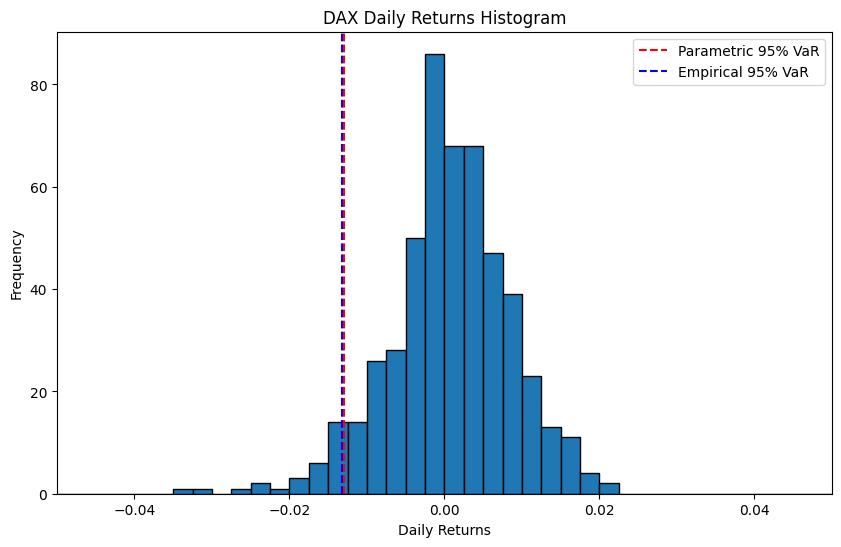

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['DAX'].pct_change().dropna(), bins=np.arange(-0.05, 0.0525, 0.0025), edgecolor='black')
plt.axvline(-var_dax, color='red', linestyle='dashed', linewidth=1.5, label='Parametric 95% VaR')
plt.axvline(empirical_var_dax, color='blue', linestyle='dashed', linewidth=1.5, label='Empirical 95% VaR')
plt.xlim(-0.05, 0.05)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('DAX Daily Returns Histogram')
plt.legend()
plt.show()

1. (f) Analyze how the 95% parametric VaR changes with the investment horizon. Create a plot with the following features:
X-axis: Trading days, ranging from 1 to 250
Y-axis: Corresponding parametric 95% VaR

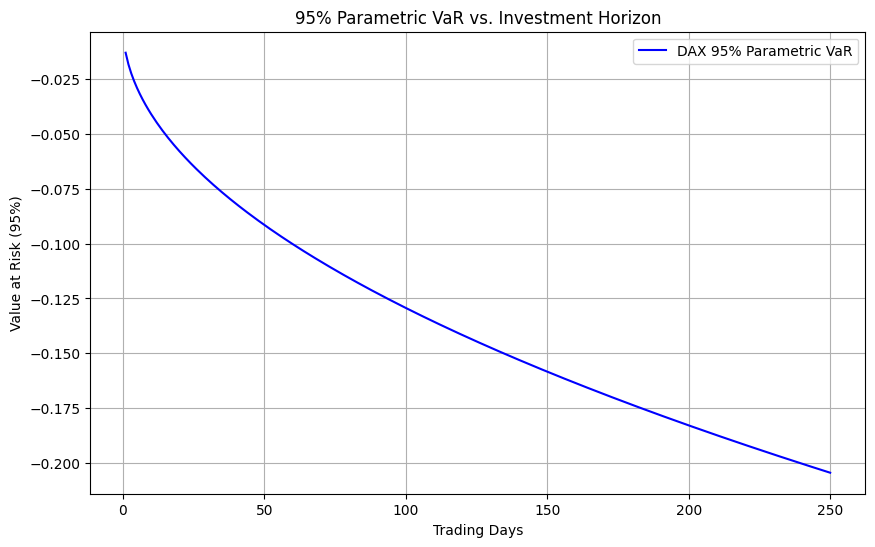

In [36]:
plt.figure(figsize=(10, 6))
trading_days = np.arange(1, 251)
var_dax_horizon = z_value * std_daily_return_dax * np.sqrt(trading_days)
plt.plot(trading_days, -var_dax_horizon, label='DAX 95% Parametric VaR', color='blue')
plt.xlabel('Trading Days')
plt.ylabel('Value at Risk (95%)')
plt.title('95% Parametric VaR vs. Investment Horizon')
plt.legend()
plt.grid()
plt.show()

# Part 2: Portfolio Variance under CAPM


In [37]:
average_beta = 0.5
var_market = 0.04
var_residual = 0.09

2. (a) Calculate the portfolio variance for a portfolio of 100 assets assuming the average correlation between residuals is 0.2 and then 0.8.

In [38]:
# Part 2(a)
p_1 = 0.2
p_2 = 0.8
n = 100

var_portfolio_1 = (average_beta**2 * var_market) + (var_residual * ((1 - p_1) / n + p_1))
var_portfolio_2 = (average_beta**2 * var_market) + (var_residual * ((1 - p_2) / n + p_2))

print(f"Portfolio Variance with p=0.2: {var_portfolio_1:.4f}")
print(f"Portfolio Variance with p=0.8: {var_portfolio_2:.4f}")

Portfolio Variance with p=0.2: 0.0287
Portfolio Variance with p=0.8: 0.0822


2. (b) Calculate the portfolio variance for every combination(n, p) of n {1,2,...,10000} and p {0, 0.5, 1}.

Plot your results with:
    Number of assets on the x-axis
    Portfolio variance on the y-axis
    Include a separate line for each value of the correlation coefficient .

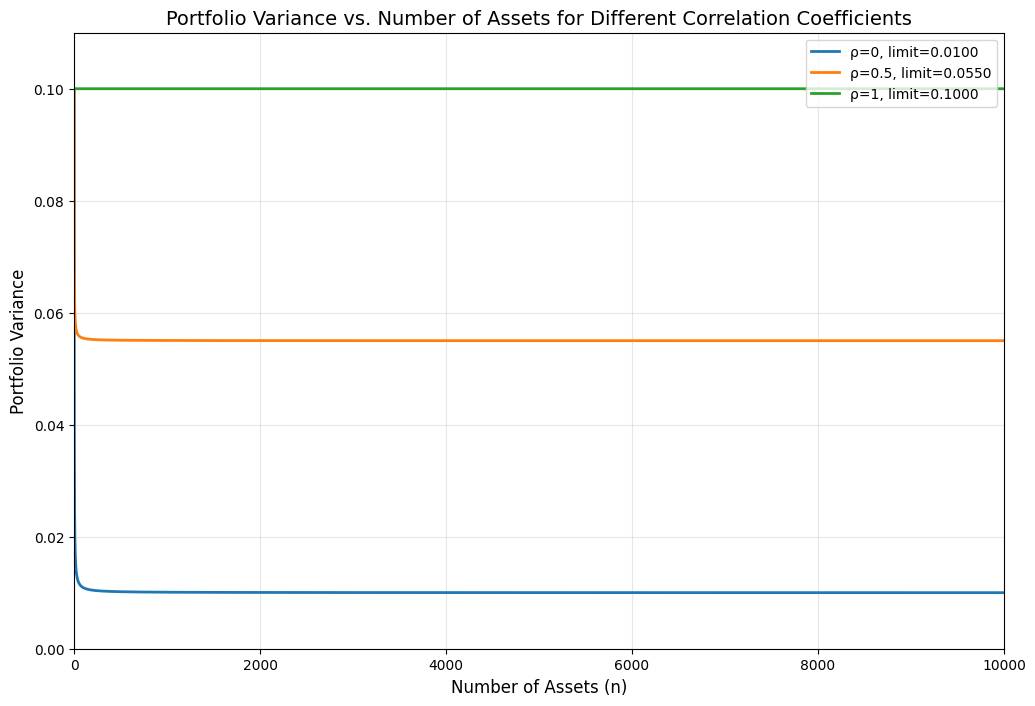

In [39]:
# Part 2(b) - More efficient calculation
n_values = np.arange(1, 10001)
p_values = [0, 0.5, 1]

plt.figure(figsize=(12, 8))

for p in p_values:
    var_portfolio_array = (average_beta**2 * var_market) + (var_residual * ((1 - p) / n_values + p))
    plt.plot(n_values, var_portfolio_array, label=f'ρ={p}, limit={var_portfolio_array[-1]:.4f}', linewidth=2)

plt.xlabel('Number of Assets (n)', fontsize=12)
plt.ylabel('Portfolio Variance', fontsize=12)
plt.title('Portfolio Variance vs. Number of Assets for Different Correlation Coefficients', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xlim(0, 10000)
plt.ylim(0, 0.11)
plt.show()

# Part 3: Betas
Teladoc (TDOC)
Nike (NKE)
American Water Works (AWK)
S&P 500 Total Return Index (SPXTR)
The columns for TDOC, NKE, and AWK report cumulative total returns, starting at 0% on July 2, 2015. Please be careful when calculating daily returns for these columns because you cannot use the usual price return formula . SPXTR represents the total return index of the S&P 500, which we use as the market portfolio. It is not a cumulative return — it is an actual index value. SOFR represents the risk-free rate, given as an annualized percentage (APR). You need to convert this to daily rates assuming 360 days per year. Finally, the columns TDOC, NKE, AWK, and SOFR are all expressed in percent (%). Convert them to decimal form before performing any calculations.

Compute the daily simple returns for all assets. These returns will be used for estimating betas in the next steps.

In [40]:
data_stocks = pd.read_csv('Stocks.csv')
data_stocks = data_stocks.set_index('Date')
data_stocks.index = pd.to_datetime(data_stocks.index)
data_stocks = data_stocks.sort_index(ascending=True)
data_stocks

/var/folders/qz/zw2_l33977s2ysrh3q_yxj740000gn/T/ipykernel_22352/1418296914.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_stocks.index = pd.to_datetime(data_stocks.index)


,TDOC,NKE,AWK,SPXTR,SOFR
Date,,,,,
2015-07-02,0.00,0.00,0.00,NaN,NaN
2015-07-06,-4.68,-0.03,0.72,3827.35,0.10
2015-07-07,-3.54,1.29,2.47,3850.66,0.10
2015-07-08,-6.25,-0.55,2.67,3787.67,0.10
2015-07-09,-4.79,-0.39,0.66,3796.26,0.12
...,...,...,...,...,...
2025-06-24,-71.43,26.14,246.06,13461.10,4.30
2025-06-25,-72.96,24.92,240.88,13461.17,4.36
2025-06-26,-71.25,28.44,236.91,13569.29,4.40


3. (a) Calculate the simple daily return on April 9, 2025 for TDOC, NKE, AWK, and SPXTR.

In [41]:
# Convert cumulative returns to decimal form
data_stocks['TDOC'] = data_stocks['TDOC'] / 100
data_stocks['NKE'] = data_stocks['NKE'] / 100
data_stocks['AWK'] = data_stocks['AWK'] / 100
data_stocks['SOFR'] = data_stocks['SOFR'] / 100

# Calculate daily simple returns for cumulative returns (TDOC, NKE, AWK)
# For cumulative returns: r_t = (1 + R_t) / (1 + R_{t-1}) - 1
data_stocks['TDOC_return'] = (1 + data_stocks['TDOC']) / (1 + data_stocks['TDOC'].shift(1)) - 1
data_stocks['NKE_return'] = (1 + data_stocks['NKE']) / (1 + data_stocks['NKE'].shift(1)) - 1
data_stocks['AWK_return'] = (1 + data_stocks['AWK']) / (1 + data_stocks['AWK'].shift(1)) - 1

# Calculate daily simple returns for SPXTR (index value)
data_stocks['SPXTR_return'] = data_stocks['SPXTR'].pct_change()

# Convert SOFR from annual rate to daily rate (360 days per year)
data_stocks['SOFR_daily'] = data_stocks['SOFR'] / 360

# Calculate excess returns for regression
data_stocks['TDOC_excess'] = data_stocks['TDOC_return'] - data_stocks['SOFR_daily']
data_stocks['NKE_excess'] = data_stocks['NKE_return'] - data_stocks['SOFR_daily']
data_stocks['AWK_excess'] = data_stocks['AWK_return'] - data_stocks['SOFR_daily']
data_stocks['SPXTR_excess'] = data_stocks['SPXTR_return'] - data_stocks['SOFR_daily']

# Get returns for April 9, 2025
april_9_returns = data_stocks.loc['2025-04-09']
print(f"Daily Returns on April 9, 2025:")
print(f"TDOC: {april_9_returns['TDOC_return'] * 100:.4f}%")
print(f"NKE: {april_9_returns['NKE_return'] * 100:.4f}%")
print(f"AWK: {april_9_returns['AWK_return'] * 100:.4f}%")
print(f"SPXTR: {april_9_returns['SPXTR_return'] * 100:.4f}%")

Daily Returns on April 9, 2025:
TDOC: 10.0508%
NKE: 11.3626%
AWK: -1.3293%
SPXTR: 9.5168%


3. (c) Estimate the betas for TDOC, NKE, and AWK by running OLS with an intercept over the full sample period (see LN 4.1).

In [42]:
from scipy import stats

# Drop NaN values for regression
clean_data = data_stocks.dropna()

# Run OLS regression for each stock
# Beta for TDOC
slope_tdoc, intercept_tdoc, r_value_tdoc, p_value_tdoc, std_err_tdoc = stats.linregress(
    clean_data['SPXTR_excess'], clean_data['TDOC_excess']
)

# Beta for NKE
slope_nke, intercept_nke, r_value_nke, p_value_nke, std_err_nke = stats.linregress(
    clean_data['SPXTR_excess'], clean_data['NKE_excess']
)

# Beta for AWK
slope_awk, intercept_awk, r_value_awk, p_value_awk, std_err_awk = stats.linregress(
    clean_data['SPXTR_excess'], clean_data['AWK_excess']
)

print(f"Full Sample Beta Estimates:")
print(f"TDOC Beta: {slope_tdoc:.4f} (R²: {r_value_tdoc**2:.4f})")
print(f"NKE Beta: {slope_nke:.4f} (R²: {r_value_nke**2:.4f})")
print(f"AWK Beta: {slope_awk:.4f} (R²: {r_value_awk**2:.4f})")

Full Sample Beta Estimates:
TDOC Beta: 1.1653 (R²: 0.1221)
NKE Beta: 1.0218 (R²: 0.3592)
AWK Beta: 0.5653 (R²: 0.1962)


3. (e) Betas are not fixed but may change over time. To capture this time variation, estimate rolling betas for TDOC, NKE, and AWK using a 250-day rolling window. As before, use OLS with an intercept to estimate beta at each point. For example, the beta on April 9, 2025, should be estimated using returns from the 249 previous trading days plus April 9, 2025 (i.e., a full window of 250 observations).

What are the 250-day rolling beta estimates for TDOC, NKE, and AWK as of April 9, 2025?

In [43]:
# Calculate 250-day rolling betas
window = 250

# Initialize lists to store rolling betas
rolling_beta_tdoc = []
rolling_beta_nke = []
rolling_beta_awk = []
dates = []

# Calculate rolling betas
for i in range(window - 1, len(clean_data)):
    window_data = clean_data.iloc[i - window + 1:i + 1]
    
    # Beta for TDOC
    slope_tdoc_rolling, _, _, _, _ = stats.linregress(
        window_data['SPXTR_excess'], window_data['TDOC_excess']
    )
    rolling_beta_tdoc.append(slope_tdoc_rolling)
    
    # Beta for NKE
    slope_nke_rolling, _, _, _, _ = stats.linregress(
        window_data['SPXTR_excess'], window_data['NKE_excess']
    )
    rolling_beta_nke.append(slope_nke_rolling)
    
    # Beta for AWK
    slope_awk_rolling, _, _, _, _ = stats.linregress(
        window_data['SPXTR_excess'], window_data['AWK_excess']
    )
    rolling_beta_awk.append(slope_awk_rolling)
    
    dates.append(clean_data.index[i])

# Create DataFrame with rolling betas
rolling_betas = pd.DataFrame({
    'Date': dates,
    'TDOC_beta': rolling_beta_tdoc,
    'NKE_beta': rolling_beta_nke,
    'AWK_beta': rolling_beta_awk
}).set_index('Date')

# Get beta estimates for April 9, 2025
april_9_betas = rolling_betas.loc['2025-04-09']
print(f"250-Day Rolling Beta Estimates as of April 9, 2025:")
print(f"TDOC: {april_9_betas['TDOC_beta']:.4f}")
print(f"NKE: {april_9_betas['NKE_beta']:.4f}")
print(f"AWK: {april_9_betas['AWK_beta']:.4f}")

250-Day Rolling Beta Estimates as of April 9, 2025:
TDOC: 1.1921
NKE: 0.7813
AWK: -0.0632


3. (e) (ii) Plot the 250-day rolling beta estimates over time. Use time on the x-axis and beta values on the y-axis. Include the following in your plot:

TDOC's rolling beta in black
NKE's rolling beta in blue
AWK's rolling beta in green


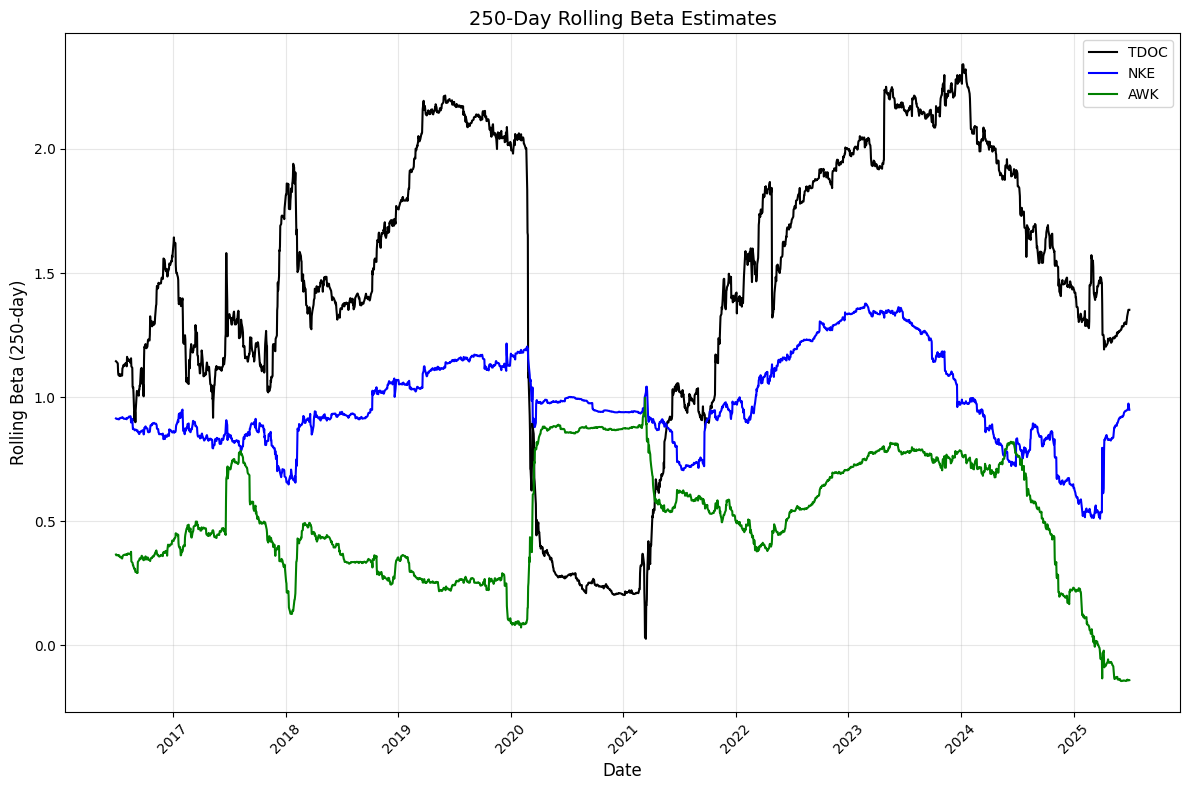

In [44]:
# Plot 250-day rolling betas
plt.figure(figsize=(12, 8))
plt.plot(rolling_betas.index, rolling_betas['TDOC_beta'], color='black', label='TDOC', linewidth=1.5)
plt.plot(rolling_betas.index, rolling_betas['NKE_beta'], color='blue', label='NKE', linewidth=1.5)
plt.plot(rolling_betas.index, rolling_betas['AWK_beta'], color='green', label='AWK', linewidth=1.5)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Beta (250-day)', fontsize=12)
plt.title('250-Day Rolling Beta Estimates', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()